In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
data = pd.read_excel(r'family_financial_and_transactions_data.xlsx')
data

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92


# Initial EDA

In [2]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0        

In [3]:

category_column = 'Category'

unique_values = data[category_column].unique()

print(f"Unique values in '{category_column}':")
print(unique_values)


Unique values in 'Category':
['Travel' 'Groceries' 'Healthcare' 'Education' 'Utilities' 'Food'
 'Entertainment']


In [4]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
                    Transaction Date        Amount         Income  \
count                          16306  16306.000000   16306.000000   
mean   2024-10-16 00:34:31.777259776    256.368534   90340.503925   
min              2024-10-01 00:00:00     10.030000   30851.000000   
25%              2024-10-08 00:00:00    134.820000   59871.000000   
50%              2024-10-16 00:00:00    256.055000   90142.000000   
75%              2024-10-24 00:00:00    379.240000  119733.000000   
max              2024-10-31 00:00:00    499.910000  149871.000000   
std                              NaN    141.153813   34740.834136   

            Savings  Monthly Expenses  Loan Payments  Credit Card Spending  \
count  16306.000000      16306.000000   16306.000000          16306.000000   
mean   24473.998038       3948.522384    2529.978965           1782.880535   
min     1037.000000       1013.000000       3.000000            510.000000   
25%    11016.000000       2582.000000    1390

#Check for missing values

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64


#Distribution of financial metrics

<Figure size 1000x600 with 0 Axes>

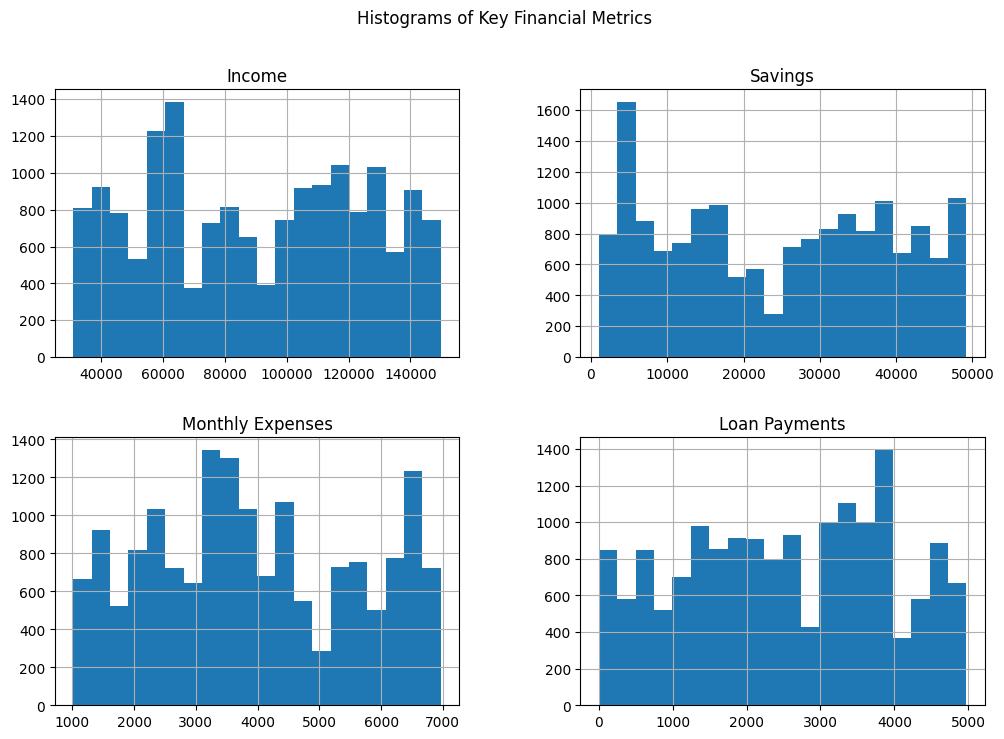

In [6]:
# Distribution of financial metrics
plt.figure(figsize=(10, 6))
data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Key Financial Metrics")
plt.show()

#Correlation Analysis

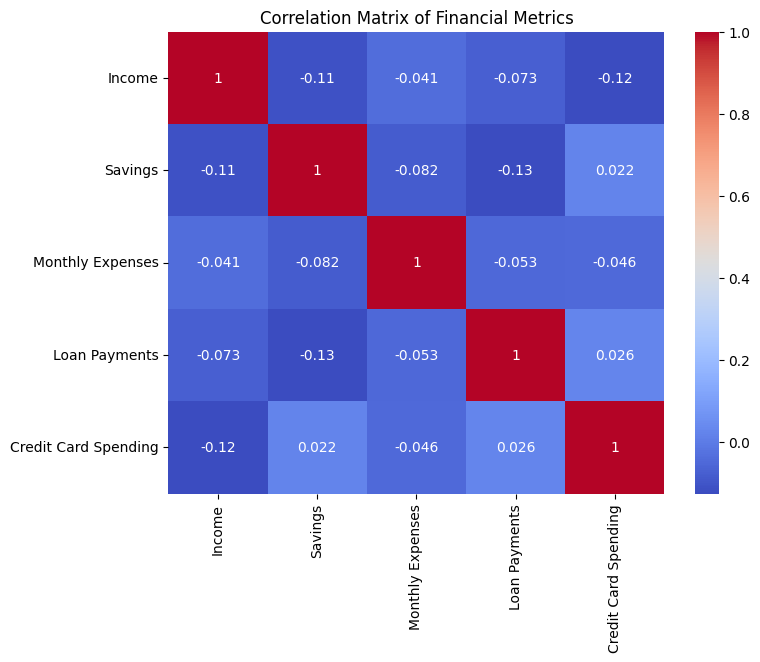

In [7]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

#No outlier Detected

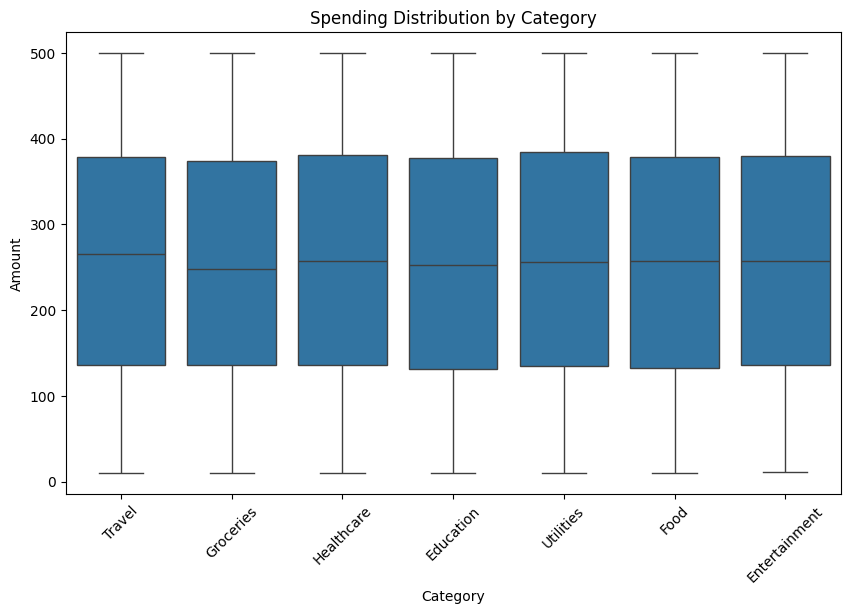

In [8]:
# Spend distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Amount', data=data)
plt.title("Spending Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# Prepare data for scoring model

In [9]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


# Define scoring logic

# Apply the scoring model

In [23]:
# Calculate key metrics
data['savings_to_income'] = (data['Savings'] / data['Income']) * 100
data['expenses_to_income'] = (data['Monthly Expenses'] / data['Income']) * 100
data['loan_to_income'] = (data['Loan Payments'] / data['Income']) * 100

# Credit Card Spending as a percentage of income
data['credit_card_trend'] = data['Credit Card Spending'] / data['Income'] * 100

# Calculate the total spending by category
category_spending = data.groupby('Category')['Amount'].sum()  # Sum of spending by category
total_spending = data['Amount'].sum()
category_spending_percent = (category_spending / total_spending) * 100

# Define categories and assign weight to each based on whether they are essential or non-essential
essential_categories = ['Groceries', 'Healthcare', 'Utilities', 'Food']
non_essential_categories = ['Entertainment', 'Travel']

# Initialize the category score
category_spending_score = {}

# Apply scoring logic based on category
for category in category_spending_percent.index:
    if category in essential_categories:
        # For essential categories, spending has less impact on score
        category_spending_score[category] = 100
    elif category in non_essential_categories:
        # For non-essential categories, higher spending reduces the score
        if category_spending_percent[category] > 20:
            category_spending_score[category] = 50  # Lower score if spending > 20% on non-essential
        else:
            category_spending_score[category] = 80  # Neutral impact

# Assign spending category score to each row based on family category spending
data['spending_category_score'] = 0
for index, row in data.iterrows():
    category = row['Category']
    data.at[index, 'spending_category_score'] = category_spending_score.get(category, 100)

# Calculate Financial Goals Met Score
data['financial_goals_score'] = data['Financial Goals Met (%)']

# Final Scoring Calculation
data['financial_score'] = (
    data['savings_to_income'] * 0.2 +
    (100 - data['expenses_to_income']) * 0.2 +
    (100 - data['loan_to_income']) * 0.2 +
    (100 - data['credit_card_trend']) * 0.15 +
    data['spending_category_score'] * 0.15 +
    data['financial_goals_score'] * 0.1
)

# Ensure final score is between 0 and 100
data['financial_score'] = data['financial_score'].clip(0, 100)

# Display the data with final score
print(data[['Family ID', 'Member ID', 'financial_score']])


<ipython-input-23-d4b15d708063>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['savings_to_income'] = (data['Savings'] / data['Income']) * 100
<ipython-input-23-d4b15d708063>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['expenses_to_income'] = (data['Monthly Expenses'] / data['Income']) * 100
<ipython-input-23-d4b15d708063>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

      Family ID       Member ID  financial_score
0        FAM001  FAM001_Member1        75.524233
27       FAM001  FAM001_Member2        78.524233
56       FAM001  FAM001_Member3        78.524233
67       FAM001  FAM001_Member4        75.524233
93       FAM002  FAM002_Member1        84.330979
...         ...             ...              ...
16231    FAM200  FAM200_Member2        94.973627
16240    FAM200  FAM200_Member3        91.973627
16262    FAM200  FAM200_Member4        91.973627
16278    FAM200  FAM200_Member5        94.973627
16298    FAM200  FAM200_Member6        91.973627

[926 rows x 3 columns]


<ipython-input-23-d4b15d708063>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['financial_goals_score'] = data['Financial Goals Met (%)']
<ipython-input-23-d4b15d708063>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['financial_score'] = (
<ipython-input-23-d4b15d708063>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [17]:
# Calculate family level score by averaging the individual member scores
family_scores = data.groupby('Family ID').agg({'final_score': 'mean'}).reset_index()

# Now the 'family_scores' will contain one score per family, rather than per member
print(family_scores)


    Family ID  final_score
0      FAM001    77.024233
1      FAM002    83.730979
2      FAM003    81.759421
3      FAM004    80.342262
4      FAM005    75.552300
..        ...          ...
195    FAM196    71.830056
196    FAM197    80.696485
197    FAM198    73.375243
198    FAM199    78.150490
199    FAM200    92.973627

[200 rows x 2 columns]


In [25]:
data

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),savings_to_income,expenses_to_income,loan_to_income,credit_card_trend,spending_category_score,financial_goals_score,final_score,financial_score
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68,17.778754,5.079518,2.128108,2.599947,80,68,75.524233,75.524233
27,FAM001,FAM001_Member2,2024-10-31,Food,295.80,113810,20234,5781,2422,2959,2,68,17.778754,5.079518,2.128108,2.599947,100,68,78.524233,78.524233
56,FAM001,FAM001_Member3,2024-10-05,Education,382.24,113810,20234,5781,2422,2959,2,68,17.778754,5.079518,2.128108,2.599947,100,68,78.524233,78.524233
67,FAM001,FAM001_Member4,2024-10-13,Travel,443.27,113810,20234,5781,2422,2959,2,68,17.778754,5.079518,2.128108,2.599947,80,68,75.524233,75.524233
93,FAM002,FAM002_Member1,2024-10-13,Education,279.18,44592,29492,5630,4541,995,3,60,66.137424,12.625583,10.183441,2.231342,100,60,84.330979,84.330979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16231,FAM200,FAM200_Member2,2024-10-16,Utilities,455.85,44621,44081,4296,2470,2831,4,92,98.789807,9.627754,5.535510,6.344546,100,92,94.973627,94.973627
16240,FAM200,FAM200_Member3,2024-10-24,Travel,99.33,44621,44081,4296,2470,2831,4,92,98.789807,9.627754,5.535510,6.344546,80,92,91.973627,91.973627
16262,FAM200,FAM200_Member4,2024-10-02,Entertainment,213.34,44621,44081,4296,2470,2831,4,92,98.789807,9.627754,5.535510,6.344546,80,92,91.973627,91.973627
16278,FAM200,FAM200_Member5,2024-10-05,Utilities,99.13,44621,44081,4296,2470,2831,4,92,98.789807,9.627754,5.535510,6.344546,100,92,94.973627,94.973627


## Function to generate recommendations

In [34]:
# Define the recommendation logic
def financial_recommendations(score):
    if score <= 60:
        return "Focus on increasing savings, cutting expenses, managing debt, and financial education."
    elif score <= 80:
        return "Monitor spending, increase emergency fund, optimize loan repayments, and start investing."
    else:
        return "Optimize investments, maintain financial discipline, maximize tax efficiency, and consider philanthropy."

# Apply the recommendation logic to the 'final_score' column
family_scores['recommendation'] = family_scores['final_score'].apply(financial_recommendations)


#Display the updated summary

In [35]:
# Show the output with recommendations
family_scores.head()

,Family ID,final_score,recommendation
0,FAM001,77.024233,"Monitor spending, increase emergency fund, opt..."
1,FAM002,83.730979,"Optimize investments, maintain financial disci..."
2,FAM003,81.759421,"Optimize investments, maintain financial disci..."
3,FAM004,80.342262,"Optimize investments, maintain financial disci..."
4,FAM005,75.552300,"Monitor spending, increase emergency fund, opt..."


#Save the family_financial_scores_with_recommendations as a CSV file

In [19]:
# Export the updated data with financial recommendations to a CSV file
family_scores.to_csv('family_financial_scores_with_recommendations.csv', index=False)



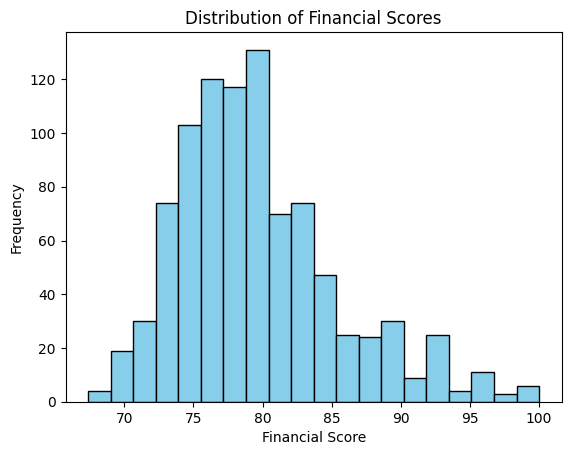

In [27]:
import matplotlib.pyplot as plt
plt.hist(data['financial_score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Financial Scores")
plt.xlabel("Financial Score")
plt.ylabel("Frequency")
plt.show()


#Illustrates the spending trends for each family member across categories

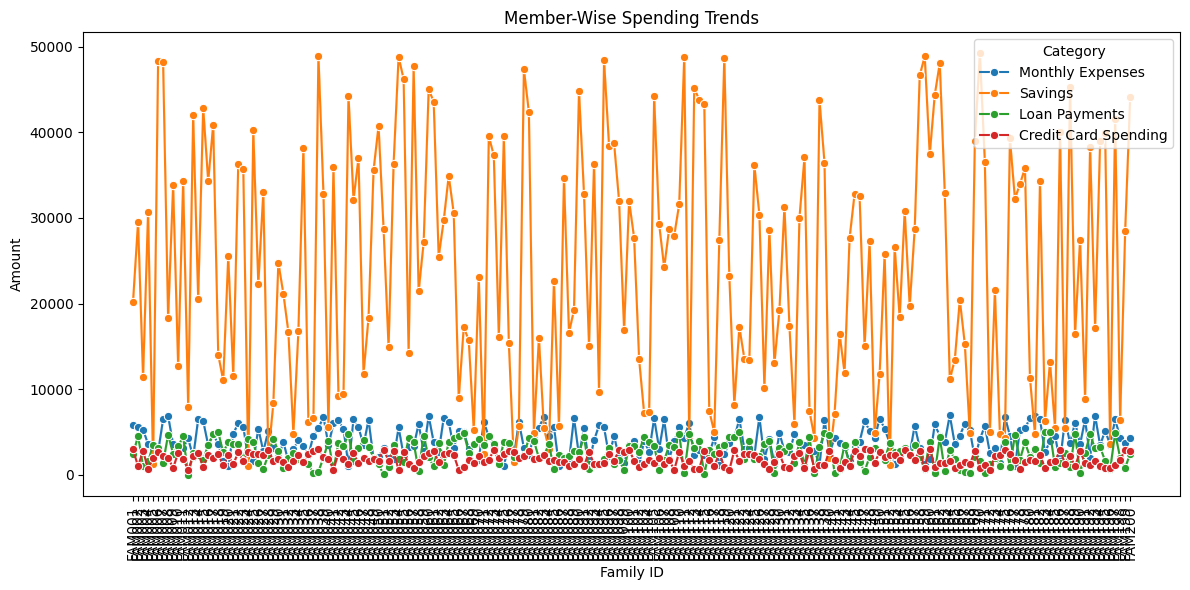

In [32]:
def plot_member_spending_trends(data):
    spending_trends = data[['Family ID', 'Monthly Expenses', 'Savings', 'Loan Payments', 'Credit Card Spending']].melt(id_vars='Family ID',
                                                                                                          var_name='Category',
                                                                                                          value_name='Amount')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Family ID', y='Amount', hue='Category', data=spending_trends, marker='o', palette='tab10')
    plt.xticks(rotation=90)
    plt.title('Member-Wise Spending Trends')
    plt.xlabel('Family ID')
    plt.ylabel('Amount')
    plt.legend(title='Category', loc='upper right')
    plt.tight_layout()
    plt.show()

plot_member_spending_trends(data)

#An interactive pie chart for spending distribution, hover over sections to view details.

In [33]:
# Plotly Interactive Visualization: Spending Distribution Across Categories
def plot_interactive_spending_distribution(data):
    category_sums = data[['Monthly Expenses', 'Savings', 'Loan Payments', 'Credit Card Spending']].sum()
    category_labels = ['Expenses', 'Savings', 'Loan Payments', 'Credit Card Usage']
    fig = px.pie(values=category_sums, names=category_labels, title='Spending Distribution Across Categories')
    fig.show()


plot_interactive_spending_distribution(data)